### **Classifying movie reviews:a binary classification example**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
# to decode review back to words
word_index = imdb.get_word_index() #---> word index is a dictionary that maps words to an integer index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
# vectorize the data to have it in a format that you can feed into a neural network
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print('x_train:')
print(x_train)
print('\n')

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print('y_train:')
print(y_train)

x_train:
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


y_train:
[1. 0. 0. ... 0. 1. 0.]


In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

x_val = x_train[:10000]
partial_X_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5091 - accuracy: 0.7884 - val_loss: 0.3781 - val_accuracy: 0.8732
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2981 - accuracy: 0.9057 - val_loss: 0.3119 - val_accuracy: 0.8820
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2181 - accuracy: 0.9299 - val_loss: 0.2773 - val_accuracy: 0.8915
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1706 - accuracy: 0.9450 - val_loss: 0.2756 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1363 - accuracy: 0.9580 - val_loss: 0.2840 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1139 - accuracy: 0.9642 - val_loss: 0.3007 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0948 - accuracy: 0.9711 - val_loss: 0.3684 - val_accuracy: 0.8676
Epoch 8/20
30

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

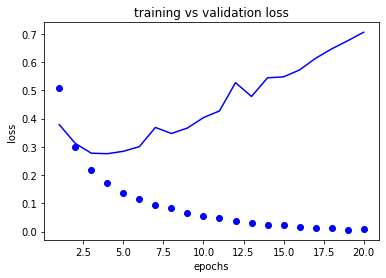

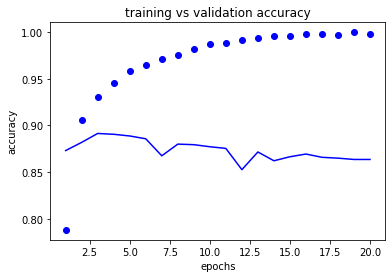

In [9]:
# plotting training vs validation loss and training vs validation accuracy
import matplotlib.pyplot as plt
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(val_acc) +1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training vs validation loss')
plt.show()

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('training vs validation accuracy')
plt.show()

- The above graphs show that the training loss decreases with every iteration while the accuracy increases.
- The validation loss increases while the accuracy decreases with every iteration.
- This is a sign of overfitting as the model cannot generalize to new data.

In [10]:
# lets train new network with less epochs to see if we reduce overfitting
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.4721 - accuracy: 0.8255
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2664 - accuracy: 0.9069
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2049 - accuracy: 0.9264
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2902 - accuracy: 0.8851


[0.29018786549568176, 0.8851199746131897]

- Accuracy 88.5%

In [11]:
# predicting sentiments
model.predict(x_test)

array([[0.2068665 ],
       [0.9995136 ],
       [0.8217684 ],
       ...,
       [0.09700128],
       [0.06801632],
       [0.50184417]], dtype=float32)

- As you can see, the network is confident for some samples (0.99 or more, or 0.01 or
less) but less confident for others (0.6, 0.4).

### **Classifying newswires:a multiclass classification example**

In [12]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
display(len(train_data))
display(len(test_data))

2121728/2110848 [==============================] - 0s 0us/step


8982

2246

In [13]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
display(decoded_newswire)

565248/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [14]:
train_labels[0]

3

In [15]:
x = [(i-3) for i in train_data[0]]
print(x)

[-2, -1, -1, 5, 40, 7, 444, 2, 22, 204, 267, 2, 3092, 108, 13, 366, 183, 87, 64, 4, 86, 2, 16, 99, 3, 16, 121, 12, 87, 64, 81, 19, 479, 23, 4, 45, 1, 46, 5, 861, 36, 206, 151, 3, 148, 3, 80, 8, 12, 19, 152, 8, 12, 4, 45, 6, 4576, 1002, 501, 3, 255, 3, 269, 8, 12, 19, 131, 41, 8, 12, 13, 5, 194, 1242, 87, 64, 49, 26, 206, 27, 29, 129, 3, 106, 12, 14, 9]


In [16]:
# Vectorizing the data
def vectorizer(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate (sequences):
    results[i, sequence] = 1
  return results

x_train = vectorizer(train_data)
x_test = vectorizer(test_labels)

In [17]:
# categorical encoding the labels
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [18]:
# Building the network
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 53ms/step - loss: 2.7238 - accuracy: 0.5029 - val_loss: 1.8125 - val_accuracy: 0.6060
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.4641 - accuracy: 0.6927 - val_loss: 1.3382 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0674 - accuracy: 0.7779 - val_loss: 1.1439 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8384 - accuracy: 0.8275 - val_loss: 1.0517 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6693 - accuracy: 0.8633 - val_loss: 0.9782 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5448 - accuracy: 0.8904 - val_loss: 0.9412 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4341 - accuracy: 0.9126 - val_loss: 0.9231 - val_accuracy: 0.8130
Epoch 8/20
16

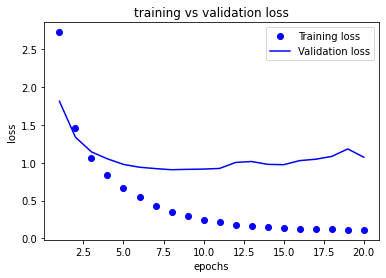

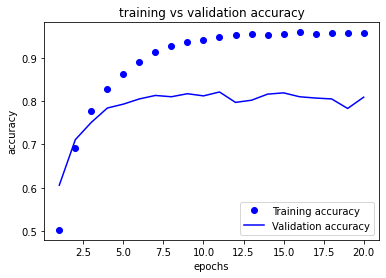

In [19]:
# plotting training vs validation loss and training vs validation accuracy
import matplotlib.pyplot as plt
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(val_acc) +1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('training vs validation loss')
plt.show()

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('training vs validation accuracy')
plt.show()

- The network seems to start to overfit after nine epochs.

In [20]:
# Reducing the number of epochs
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(x_train, y_train, epochs = 9, batch_size = 512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
18/18 [==============================] - 1s 39ms/step - loss: 2.4210 - accuracy: 0.5090
Epoch 2/9
18/18 [==============================] - 1s 40ms/step - loss: 1.3071 - accuracy: 0.7198
Epoch 3/9
18/18 [==============================] - 1s 39ms/step - loss: 0.9773 - accuracy: 0.7914
Epoch 4/9
18/18 [==============================] - 1s 40ms/step - loss: 0.7672 - accuracy: 0.8365
Epoch 5/9
18/18 [==============================] - 1s 40ms/step - loss: 0.6058 - accuracy: 0.8753
Epoch 6/9
18/18 [==============================] - 1s 39ms/step - loss: 0.4809 - accuracy: 0.9009
Epoch 7/9
18/18 [==============================] - 1s 41ms/step - loss: 0.3858 - accuracy: 0.9186
Epoch 8/9
18/18 [==============================] - 1s 39ms/step - loss: 0.3160 - accuracy: 0.9303
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 3.4494 - accuracy: 0.3620
[3.4493579864501953, 0.36197686195373535]


In [21]:
# predictions
pred = model.predict(x_test)
display(len(pred[0]))
display(np.sum(pred[0]))
display(pred[0])

46

1.0

array([0.01885152, 0.02668838, 0.02230832, 0.04103795, 0.0313358 ,
       0.01932639, 0.0178556 , 0.02053288, 0.02180596, 0.02230266,
       0.02133521, 0.02463294, 0.02335015, 0.02303304, 0.01922929,
       0.02176373, 0.0252827 , 0.02145834, 0.01852431, 0.02611323,
       0.02446367, 0.02127905, 0.02009416, 0.02171578, 0.02424412,
       0.02064055, 0.01574224, 0.02061988, 0.02213818, 0.0203264 ,
       0.01975372, 0.02165579, 0.01981365, 0.02204649, 0.02143965,
       0.01985266, 0.02108101, 0.02151084, 0.02033443, 0.02360124,
       0.01991074, 0.0197935 , 0.0189512 , 0.01879312, 0.01793579,
       0.0154938 ], dtype=float32)

### **Predicting house prices: a regression example**

In [23]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [24]:
# Preparing the data ---> do feature-wise normalization on  since feature data is on different scales
# for each feature subtract the mean then divide by std of the feature

train_mean = train_data.mean(axis=0)
train_std = train_data.std(axis=0)
# train_data
train_data -= train_mean
train_data /= train_std
# test_data
test_data -= train_mean
test_data /= train_std

In [26]:
# Building your network
# --> Because you’ll need to instantiate the same model multiple times, you use a function to construct it.

def build_model():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [33]:
# Validating your model with K-fold cross-validation
import numpy as np
k = 4
num_val_samples = len(train_data) // 4
epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_labels = np.concatenate([train_labels[:i * num_val_samples], train_labels[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_labels, epochs = epochs, batch_size=1, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
  all_scores.append(val_mae)

display(all_scores)
np.mean(all_scores)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


[2.26082444190979, 2.6101021766662598, 2.678910255432129, 2.228130340576172]

2.4444918036460876

In [36]:
# trying 500 epochs

epochs = 500
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_labels = np.concatenate([train_labels[:i * num_val_samples], train_labels[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_labels, validation_data = (val_data, val_labels), epochs = epochs, batch_size=1, verbose = 0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)


processing fold # 0


KeyError: ignored

In [ ]:
average_mae_history = [np.mean([x(i) for x in all_mae_histories]) for i in range(epochs)]
